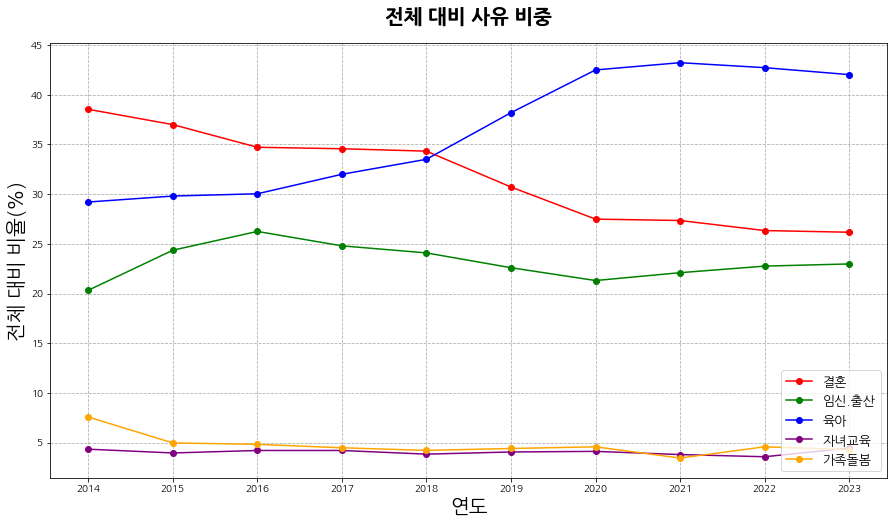

,연도,경력단절여성 전체(수),결혼,임신.출산,육아,자녀교육,가족돌봄,전체 대비 결혼 비중,전체 대비 임신.출산 비중,전체 대비 육아 비중,전체 대비 자녀교육 비중,전체 대비 가족돌봄 비중
0,2014,2164,834,440,632,94,164,38.54,20.33,29.21,4.34,7.58
1,2015,2073,767,505,618,82,103,37.00,24.36,29.81,3.96,4.97
2,2016,1924,668,505,578,81,93,34.72,26.25,30.04,4.21,4.83
3,2017,1831,633,454,586,77,82,34.57,24.80,32.00,4.21,4.48
4,2018,1847,634,445,619,71,78,34.33,24.09,33.51,3.84,4.22
5,2019,1699,522,384,649,69,75,30.72,22.60,38.20,4.06,4.41
6,2020,1506,414,321,640,62,69,27.49,21.31,42.50,4.12,4.58
7,2021,1448,396,320,626,55,50,27.35,22.10,43.23,3.80,3.45
8,2022,1397,368,318,597,50,64,26.34,22.76,42.73,3.58,4.58
9,2023,1349,353,310,567,60,58,26.17,22.98,42.03,4.45,4.30


In [1]:
# 경력단절 사유

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# 데이터 부르기
df100=pd.read_csv('연령대별_사유별_경력단절여성_20240819094655.csv',encoding='cp949')

# Cleansing & Fixing
df100=df100.iloc[0:6,:].T.reset_index()
df100=df100.drop([0],axis=0)
df100=df100.rename(columns=df100.iloc[0])
df100=df100.drop(df100.index[0]).reset_index().drop(columns='index',axis=1)
df100=df100.rename(columns={'사유별':'연도'})
df100=df100.rename(columns={'경력단절여성':'경력단절여성 전체(수)','- 결혼':'결혼','- 임신.출산':'임신.출산',\
            '- 육아':'육아','- 자녀교육':'자녀교육','- 가족돌봄':'가족돌봄'})
df100=df100.astype({'경력단절여성 전체(수)':'int32','결혼':'int32','임신.출산':'int32',\
              '육아':'int32','자녀교육':'int32','가족돌봄':'int32'})

# # '경력단절사유' 멀티칼럼 추가
# col=[['','','경력단절사유','경력단절사유','경력단절사유','경력단절사유','경력단절사유'],\
#      ['연도','경력단절여성 전체(수)','결혼','임신.출산','육아','자녀교육','가족돌봄']]
# df100.columns = col

# 각 사유 전체 대비 비중 칼럼 추가
df100=df100.set_index(keys='연도')

df100['전체 대비 결혼 비중']=round((df100['결혼']/df100['경력단절여성 전체(수)'])*100,2)
df100['전체 대비 임신.출산 비중']=round((df100['임신.출산']/df100['경력단절여성 전체(수)'])*100,2)
df100['전체 대비 육아 비중']=round((df100['육아']/df100['경력단절여성 전체(수)'])*100,2)
df100['전체 대비 자녀교육 비중']=round((df100['자녀교육']/df100['경력단절여성 전체(수)'])*100,2)
df100['전체 대비 가족돌봄 비중']=round((df100['가족돌봄']/df100['경력단절여성 전체(수)'])*100,2)

df100=df100.reset_index()

# 한글 폰트
font_path='NanumGothic.ttf' 
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name) 

# 시각화
fig2=plt.figure(figsize=(15,8))
axes2=fig2.add_subplot(111)

axes2.plot(df100['연도'].values,df100['전체 대비 결혼 비중'],color='red',marker='o',label='결혼')
axes2.plot(df100['연도'].values,df100['전체 대비 임신.출산 비중'],color='green',marker='o',label='임신.출산')
axes2.plot(df100['연도'].values,df100['전체 대비 육아 비중'],color='blue',marker='o',label='육아')
axes2.plot(df100['연도'].values,df100['전체 대비 자녀교육 비중'],color='purple',marker='o',label='자녀교육')
axes2.plot(df100['연도'].values,df100['전체 대비 가족돌봄 비중'],color='orange',marker='o',label='가족돌봄')

plt.title("전체 대비 사유 비중",fontsize=20,fontweight='bold', pad=20)
plt.xlabel('연도',fontsize=20)
plt.ylabel('전체 대비 비율(%)',fontsize=20)
plt.grid(linestyle = '--')
plt.legend(loc=4,fontsize=13)
# plt.savefig('경력단절 사유.png')
plt.savefig('경력단절 사유.jpg')
plt.show()

df100